          AGE       SEX       BMI        BP        S1        S2        S3  \
AGE  1.000000  0.173737  0.185085  0.335428  0.260061  0.219243 -0.075181   
SEX  0.173737  1.000000  0.088161  0.241010  0.035277  0.142637 -0.379090   
BMI  0.185085  0.088161  1.000000  0.395411  0.249777  0.261170 -0.366811   
BP   0.335428  0.241010  0.395411  1.000000  0.242464  0.185548 -0.178762   
S1   0.260061  0.035277  0.249777  0.242464  1.000000  0.896663  0.051519   
S2   0.219243  0.142637  0.261170  0.185548  0.896663  1.000000 -0.196455   
S3  -0.075181 -0.379090 -0.366811 -0.178762  0.051519 -0.196455  1.000000   
S4   0.203841  0.332115  0.413807  0.257650  0.542207  0.659817 -0.738493   
S5   0.270774  0.149916  0.446157  0.393480  0.515503  0.318357 -0.398577   
S6   0.301731  0.208133  0.388680  0.390430  0.325717  0.290600 -0.273697   

           S4        S5        S6  
AGE  0.203841  0.270774  0.301731  
SEX  0.332115  0.149916  0.208133  
BMI  0.413807  0.446157  0.388680  
BP   0.2

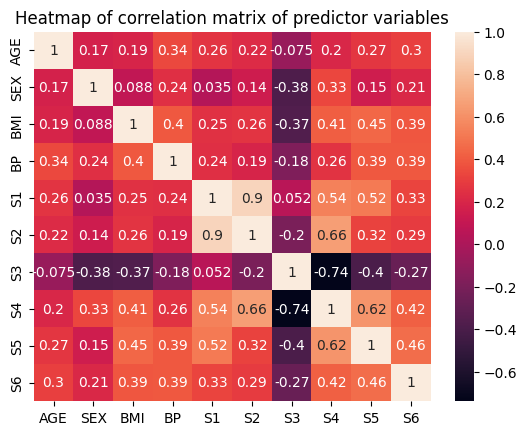

Mean Square Error of model1: 2859.6963475867506
adj R-squared for model1: 0.5065592904853231
variables chosen by forward selection: ['BMI', 'S5', 'BP', 'S1', 'SEX', 'S2']
MSE for model with predictor variables chosen by forward selection: 2876.683251787016
adj R-squared for model with predictor variables chosen by forward selection: 0.5081925379384118


In [26]:
# Q3

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

from stepwise_regression import step_reg

def question_three():
    diabetes_worksheet = pd.read_excel("Diabetes_Data.xlsx")
    
    # retrieve columns of explanatory variables
    X = diabetes_worksheet.iloc[:, :-1]
    
    # create correlation matrix of explanatory variables
    corr_matrix = X.corr()
    print(corr_matrix)
    
    # create heap map
    sns.heatmap(corr_matrix, annot=True)
    plt.title("Heatmap of correlation matrix of predictor variables")
    plt.show()
    
    # add constant to explanatory variables
    X = sm.add_constant(X)
    
    # create multivariate linear model 
    y = diabetes_worksheet.iloc[:, -1]
    model1 = sm.OLS(y, X).fit()
    
    # calculate mean-squared error
    print("Mean Square Error of model1:", sm.tools.eval_measures.mse(model1.fittedvalues, y))
    
    # calculate adjusted r-squared value
    print("adj R-squared for model1:", model1.rsquared_adj)
    
    # use forward selection in stepwise regression to compose new model
    forward_select_vars = step_reg.forward_regression(X.iloc[:, 1:], y, 0.05, verbose=False)
    print("variables chosen by forward selection:", forward_select_vars)
    
    # create model with only variables chosen by forward selection as predictor variables
    X_stepwise_reg = diabetes_worksheet[forward_select_vars]
    X_stepwise_reg = sm.add_constant(X_stepwise_reg)
    model2 = sm.OLS(y, X_stepwise_reg).fit()
    
    # calculate MSE and adjusted r-squared value for stepwise regression model
    print("MSE for model with predictor variables chosen by forward selection:", sm.tools.eval_measures.mse(model2.fittedvalues, y))
    print("adj R-squared for model with predictor variables chosen by forward selection:", model2.rsquared_adj)
    
question_three()

In [79]:
# Q4

import numpy as np
import pandas as pd

from tabulate import tabulate
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

import statsmodels.api as sm 

def question_four():
    titanic_worksheet = pd.read_csv('titanic3.csv')
    
    # calculate total number of passengers aboard the titanic
    total_passengers = len(titanic_worksheet['survived'])
    
    # calculate number of passengers that survived
    passengers_survived = np.where(titanic_worksheet['survived'].to_numpy() == 1)[0].shape[0]
    
    # calculate probability of survival
    prob_survival = passengers_survived / total_passengers
    print("probability of survival for a passenger on the titanic:", prob_survival)
    
    # retrieve passenger class, gender, and age column
    p_class = titanic_worksheet['pclass']
    gender = titanic_worksheet['sex']
    
    # retrieve unique values for passenger class, gender, and age
    p_classes = p_class.unique()
    genders = gender.unique()
    
    # retrieve the survival probability for all passenger classes
    p_classes_prob = []
    for c in p_classes:
        df = titanic_worksheet.loc[titanic_worksheet['pclass'] == c]
        total_num_c = len(df)
        num_survived_c = len(df.loc[df['survived'] == 1])
        p_classes_prob.append(num_survived_c / total_num_c)
    
    # retrieve survival probability for all genders
    genders_prob = []
    for g in genders:
        df = titanic_worksheet.loc[titanic_worksheet['sex'] == g]
        total_num_g = len(df)
        num_survived_g = len(df.loc[df['survived'] == 1])
        genders_prob.append(num_survived_g / total_num_g)
    
    # retrieve survival probability for all ages    
    ages_prob = []
    for age in range(0, 90, 10):
        min_age_i = age
        max_age_i = age + 10
        df = titanic_worksheet.loc[(titanic_worksheet['age'] >= min_age_i) & (titanic_worksheet['age'] < max_age_i)]
        total_num_age_interval = len(df)
        num_survived_age_interval = len(df.loc[df['survived'] == 1])
        ages_prob.append(num_survived_age_interval / total_num_age_interval)
    
    # survival probability table broken down by passenger class    
    df_classes_prob = pd.DataFrame(np.array([p_classes_prob]), columns=p_classes)
    classes_table = tabulate(df_classes_prob, headers=['Class 1', 'Class 2', 'Class 3'], tablefmt="grid")
    print(classes_table)
    
    # survival probability table broken down by gender
    df_genders_prob = pd.DataFrame(np.array([genders_prob]), columns=genders)
    genders_table = tabulate(df_genders_prob, headers=df_genders_prob, tablefmt="grid")
    print(genders_table)
    
    # survival probability broken down by age intervals
    df_ages_prob = pd.DataFrame(np.array([ages_prob]), columns=['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89'])
    ages_table = tabulate(df_ages_prob, headers=df_ages_prob.columns, tablefmt="grid")
    print(ages_table)    

    X = titanic_worksheet[['pclass', 'sex', 'age']]
    y = titanic_worksheet['survived']
    
    # separate data into training and test data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)
    
    # convert non-scalar values to scalar in training set
    le = LabelEncoder()
    p_class = le.fit_transform(X_train['pclass'])
    gender = le.fit_transform(X_train['sex'])
    age = le.fit_transform(X_train['age'])
    X_train = np.vstack((p_class, gender, age)).T
    
    # build logistic regression model
    logreg = LogisticRegression(random_state=16)
    model = logreg.fit(X_train, y_train)
    
    # get params estimates
    print(model.coef_)
    
    # get p-values
    model = sm.Logit(y_train, sm.add_constant(X_train)).fit()
    print(model.pvalues[1:])
    
    # convert non-scalar values to scalar in test set
    p_class_test = le.fit_transform(X_test['pclass'])
    gender_test = le.fit_transform(X_test['sex'])
    age_test = le.fit_transform(X_test['age'])
    X_test = np.vstack((p_class_test, gender_test, age_test)).T
    
    # predict values based on test set
    y_pred = logreg.predict(X_test)
    
    # create confusion matrix
    conf_matrix = metrics.confusion_matrix(y_test, y_pred)
    print(conf_matrix)
    
    target_names = ['did not survive', 'survived']
    print(classification_report(y_test, y_pred, target_names=target_names))
question_four()

probability of survival for a passenger on the titanic: 0.3819709702062643
+----+-----------+-----------+-----------+
|    |   Class 1 |   Class 2 |   Class 3 |
+====+===========+===========+===========+
|  0 |  0.619195 |  0.429603 |  0.255289 |
+----+-----------+-----------+-----------+
+----+----------+----------+
|    |   female |     male |
+====+==========+==========+
|  0 | 0.727468 | 0.190985 |
+----+----------+----------+
+----+----------+----------+----------+----------+----------+----------+---------+----------+---------+
|    |      0-9 |    10-19 |    20-29 |    30-39 |    40-49 |    50-59 |   60-69 |    70-79 |   80-89 |
+====+==========+==========+==========+==========+==========+==========+=========+==========+=========+
|  0 | 0.609756 | 0.391608 | 0.369186 | 0.422414 | 0.385185 | 0.457143 |  0.3125 | 0.142857 |       1 |
+----+----------+----------+----------+----------+----------+----------+---------+----------+---------+
[[-0.88300359 -2.53261944 -0.01218418]]
Optim